<a href="https://colab.research.google.com/github/aditya161205/Data-DaVinci/blob/main/torchNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
class BasicNN (nn.Module):
  def __init__(self):
    super().__init__()
    self.w00=nn.Parameter(torch.tensor(1.7),requires_grad=False)
    self.b00=nn.Parameter(torch.tensor(-0.85),requires_grad=False)
    self.w01=nn.Parameter(torch.tensor(-40.0),requires_grad=False)

    self.w10=nn.Parameter(torch.tensor(12.6),requires_grad=False)
    self.b10=nn.Parameter(torch.tensor(0.0),requires_grad=False)
    self.w11=nn.Parameter(torch.tensor(2.7),requires_grad=False)

    self.b=nn.Parameter(torch.tensor(0.0),requires_grad=True)

  def forward(self,input):
    input_top=input*self.w00 + self.b00
    output_top=F.relu(input_top)
    output_top_scaled=output_top*self.w01

    input_bottom=input*self.w10 + self.b10
    output_bottom=F.relu(input_bottom)
    output_bottom_scaled= output_bottom*self.w11

    input_relu=output_bottom_scaled+output_top_scaled + self.b

    output=F.relu(input_relu)

    return output





In [28]:
input_doses=torch.linspace(start=0,end=1,steps=11)

inputs=torch.tensor([0.0,0.5,1.0])
labels=torch.tensor([0.0,1.0,0.0])

In [29]:
#training the modle
model=BasicNN()

optimizer=SGD(model.parameters(),lr=0.1)

for epoch in range(100):
  total_loss=0
  for itr in range(len(inputs)):
    input_i=inputs[itr]
    label_i=labels[itr]

    output_i=model(input_i)
    loss= (output_i-label_i)**2

    loss.backward()
    total_loss+=float(loss)

  if(total_loss<0.0001):
    break
  optimizer.step()
  optimizer.zero_grad()

In [30]:

output_value=model(input_doses)

<Axes: xlabel='None', ylabel='None'>

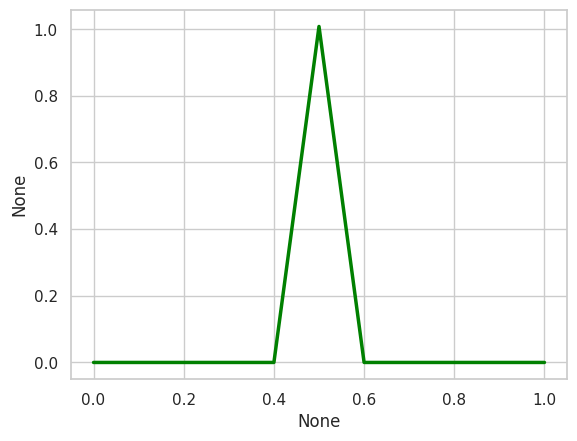

In [31]:
sns.set(style="whitegrid")
sns.lineplot(x=input_doses,y=output_value.detach(),color='green',linewidth=2.5)